In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [21]:
suffixes = {
    'gt': '_gt',
    'prior': '_prior',
    'prior_only': '_only',
    'cluster_first': '_cluster_first',
    'kernel_rbf': '_kernel_rbf',
    'kernel_laplacian': '_kernel_laplacian',
    'euclidean': '_euclidean',
    'cosine': '_cosine'
}

In [22]:
random_seed = 12
train_style = 'learn_from_scratch'
dataset_name = 'replogle_k562_essential_hvg' # 'replogle_rpe1_hvg'
representation_type = 'DepMap_GeneEffect'
leave_out_test_set_id = "active_learning_fold_1"
reconstruction_loss = 'mmd' # mmd or mse
random_seed_lst = [8, 9, 10, 11, 12]
main_figure = True # True if save to main figure, False if save to supplementary figure

num_round = 5 # number of rounds
initial_num_ptb = 100  # number of initial perturbations to sample (for the first round)
num_ptb = 100  # number of total perturbations to sample each time
eval_metric = 'mmd' # or 'rmse', mmd, auc_value, alignment_score, precision_at_10, precision_at_15, precision_at_20, spearman_rank

initial_epochs = 100
incremental_epochs = 100
decay_factor = 1.0
tolerance_epochs = 20
val_ratio = 0.1


compare1 = 'learn_loss_mse'
compare2 = 'learn_loss_mse_prior_only'
compare3 = None
compare4 = None
compare5 = None

# Initialize empty DataFrames to hold the combined results
combined_baseline_df = pd.DataFrame()
combined_active_learning_df = pd.DataFrame()

# Initialize empty DataFrames to hold the combined alignment scores
combined_baseline_alignment_df = pd.DataFrame()
combined_active_learning_alignment_df = pd.DataFrame()

for random_seed in random_seed_lst:
    output_dir = '/home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/'+dataset_name+'/'+ \
        leave_out_test_set_id+'/'+representation_type+'/'+ \
        reconstruction_loss + '/' + train_style + '/' +\
            str(num_round)+'_round_'+str(num_ptb)+'_ptb_' + str(initial_num_ptb) + '_initial_ptb/' +\
            str(initial_epochs)+'_init_epochs_'+str(incremental_epochs)+'_incremental_epochs_'+str(decay_factor)+'_decay_factor_' +str(tolerance_epochs)+'_tolerance/'+\
            'val_ratio_'+str(val_ratio)+'/' + "seed_"+str(random_seed)+'/'
    
    print('reading results from:', output_dir)
    
    # Read the baseline results
    baseline_df = pd.read_csv(os.path.join(output_dir, 'baseline/results_df.csv'))
    baseline_df['leave_out_test_set_id'] = leave_out_test_set_id
    baseline_df['random_seed'] = random_seed 
    combined_baseline_df = pd.concat([combined_baseline_df, baseline_df], ignore_index=True)
    with open(os.path.join(output_dir, 'baseline/config.json')) as f:
        baseline_config = json.load(f)
        
    if compare1 is not None:
        active_learning_df_1 = pd.read_csv(os.path.join(output_dir, compare1+'/results_df.csv'))
        active_learning_df_1['leave_out_test_set_id'] = leave_out_test_set_id
        active_learning_df_1['random_seed'] = random_seed
        for key, suffix in suffixes.items():
            if key in compare1:
                active_learning_df_1['test_method'] = active_learning_df_1['test_method'] + suffix
        combined_active_learning_df = pd.concat([combined_active_learning_df, active_learning_df_1], ignore_index=True)

    if compare2 is not None:
        active_learning_df_2 = pd.read_csv(os.path.join(output_dir, compare2+'/results_df.csv'))
        active_learning_df_2['leave_out_test_set_id'] = leave_out_test_set_id
        active_learning_df_2['random_seed'] = random_seed
        for key, suffix in suffixes.items():
            if key in compare2:
                active_learning_df_2['test_method'] = active_learning_df_2['test_method'] + suffix
        combined_active_learning_df = pd.concat([combined_active_learning_df, active_learning_df_2], ignore_index=True)

    if compare3 is not None:
        active_learning_df_3 = pd.read_csv(os.path.join(output_dir, compare3+'/results_df.csv'))
        active_learning_df_3['leave_out_test_set_id'] = leave_out_test_set_id
        active_learning_df_3['random_seed'] = random_seed
        for key, suffix in suffixes.items():
            if key in compare3:
                active_learning_df_3['test_method'] = active_learning_df_3['test_method'] + suffix
        combined_active_learning_df = pd.concat([combined_active_learning_df, active_learning_df_3], ignore_index=True)

    if compare4 is not None:
        active_learning_df_4 = pd.read_csv(os.path.join(output_dir, compare4+'/results_df.csv'))
        active_learning_df_4['leave_out_test_set_id'] = leave_out_test_set_id
        active_learning_df_4['random_seed'] = random_seed
        for key, suffix in suffixes.items():
            if key in compare4:
                active_learning_df_4['test_method'] = active_learning_df_4['test_method'] + suffix
        combined_active_learning_df = pd.concat([combined_active_learning_df, active_learning_df_4], ignore_index=True)

    if compare5 is not None:
        active_learning_df_5 = pd.read_csv(os.path.join(output_dir, compare5+'/results_df.csv'))
        active_learning_df_5['leave_out_test_set_id'] = leave_out_test_set_id
        active_learning_df_5['random_seed'] = random_seed
        for key, suffix in suffixes.items():
            if key in compare5:
                active_learning_df_5['test_method'] = active_learning_df_5['test_method'] + suffix
        combined_active_learning_df = pd.concat([combined_active_learning_df, active_learning_df_5], ignore_index=True)

reading results from: /home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/replogle_k562_essential_hvg/active_learning_fold_1/DepMap_GeneEffect/mmd/learn_from_scratch/5_round_100_ptb_100_initial_ptb/100_init_epochs_100_incremental_epochs_1.0_decay_factor_20_tolerance/val_ratio_0.1/seed_8/
reading results from: /home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/replogle_k562_essential_hvg/active_learning_fold_1/DepMap_GeneEffect/mmd/learn_from_scratch/5_round_100_ptb_100_initial_ptb/100_init_epochs_100_incremental_epochs_1.0_decay_factor_20_tolerance/val_ratio_0.1/seed_9/
reading results from: /home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/replogle_k562_essential_hvg/active_learning_fold_1/DepMap_GeneEffect/mmd/learn_from_scratch/5_round_100_ptb_100_initial_ptb/100_init_epochs_100_incremental_epochs_1.0_decay_factor_20_tolerance/val_ratio_0.1/seed_10/
reading results from: /home/che/perturb-project/git/gene_ptb_predi

In [23]:
ptb_leave_out_list = baseline_config['ptb_leave_out_list']
len(ptb_leave_out_list)

204

In [24]:
print(combined_active_learning_df['test_method'].value_counts())

# assert numbers the same for each one in value_counts
assert combined_active_learning_df['test_method'].value_counts().min() == combined_active_learning_df['test_method'].value_counts().max()

test_method
learn_loss_mse               25
learn_loss_mse_prior_only    25
Name: count, dtype: int64


In [25]:
# concatenate the two dataframes
df = pd.concat([combined_baseline_df, combined_active_learning_df], axis=0)
df['initial_num_ptb'] = initial_num_ptb
df['num_ptb'] = num_ptb
df.shape

(75, 56)

In [26]:
# remove seed_number from output_dir
plot_dir = '/home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/'+dataset_name+'/'+ \
        leave_out_test_set_id+'/'+representation_type+'/'+ \
        reconstruction_loss + '/' + train_style + '/' +\
            str(num_round)+'_round_'+str(num_ptb)+'_ptb_' + str(initial_num_ptb) + '_initial_ptb/' +\
            str(initial_epochs)+'_init_epochs_'+str(incremental_epochs)+'_incremental_epochs_'+str(decay_factor)+'_decay_factor_' +str(tolerance_epochs)+'_tolerance/' + \
            'val_ratio_'+str(val_ratio)+'/'

if main_figure:
    plot_dir = plot_dir + 'main_figure/'
else:
    plot_dir = plot_dir + 'supplementary_figure/'

print('plot_dir:', plot_dir)

plot_dir: /home/che/perturb-project/git/gene_ptb_prediction/active_learning/results/replogle_k562_essential_hvg/active_learning_fold_1/DepMap_GeneEffect/mmd/learn_from_scratch/5_round_100_ptb_100_initial_ptb/100_init_epochs_100_incremental_epochs_1.0_decay_factor_20_tolerance/val_ratio_0.1/main_figure/


In [27]:
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [28]:
# rename methods in test_method in df
df['test_method'] = df['test_method'].replace({'active_learning_kmeans_center': 'Latent-based K-means center', 
                                               'active_learning_kmeans_center_prior_only': 'Prior-only K-means center',
                                               'baseline': 'Baseline',
                                               'uncertainty': 'Latent-based uncertainty'})

if main_figure:
    df['test_method'] = df['test_method'].replace({'learn_loss_mse': 'Latent-based AL',
                                                   'learn_loss_mse_prior_only': 'Prior-only AL'})

In [29]:
df['num_samples'] = df['initial_num_ptb'] + df['num_ptb']*df['round']

In [30]:
eval_metric_list = [eval_metric + '_best_val_model']

In [31]:
color_dict = {'Baseline': '#0057e7',  #blue
              'Latent-based AL': '#d62d20', #red
               'Prior-only AL': '#ffa700', #orange

              'Prior-only K-means center': '#8fce00',  #grass-green
              'Latent-based K-means center': '#f14899',  #diff red
              'Latent-based uncertainty': '#f1c232' #yellow
              
              }

mmd_best_val_model


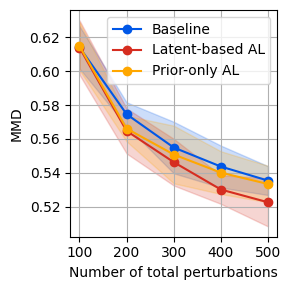

In [32]:
for eval_metric_temp in eval_metric_list:
    print(eval_metric_temp)
    # Group by 'round' and 'test_method' to calculate mean and standard deviation
    grouped_df = df.groupby(['round', 'test_method', 'num_samples']).agg({eval_metric_temp: ['mean', 'std']}).reset_index()
    grouped_df.columns = ['round', 'test_method', 'num_samples', 'mean', 'std']

    # Pivot the dataframe to have 'test_method' as columns
    pivot_mean_df = grouped_df.pivot(index='num_samples', columns='test_method', values='mean')
    pivot_std_df = grouped_df.pivot(index='num_samples', columns='test_method', values='std')

    # Plotting the line plots with shaded areas
    plt.figure(figsize=(3, 3))
    for model_type in pivot_mean_df.columns:
        color = color_dict[model_type]
        plt.plot(pivot_mean_df.index, pivot_mean_df[model_type], label=model_type, marker='o', color=color)
        plt.fill_between(pivot_mean_df.index,
                        pivot_mean_df[model_type] - pivot_std_df[model_type],
                        pivot_mean_df[model_type] + pivot_std_df[model_type],
                        alpha=0.2,
                        color=color)
        
    plt.xlabel('Number of total perturbations')
    plt.ylabel(eval_metric.upper())
    plt.legend()
    plt.grid(True)
    plt.xticks(pivot_mean_df.index, [int(x) for x in pivot_mean_df.index])
    plt.tight_layout()
    plt.show()

    save_df = pivot_mean_df.round(3)

In [33]:
if main_figure:
    legend_order = ['Baseline', 'Prior-only AL', 'Latent-based AL']
else:
    legend_order = ['Baseline', 'Prior-only K-means center', 'Latent-based K-means center', 
                    'Latent-based uncertainty', 'kmeans_center_weight_uncertainty']

mmd_best_val_model


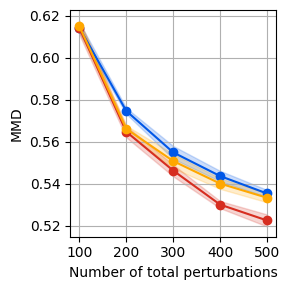

<Figure size 600x100 with 0 Axes>

In [34]:
for eval_metric_temp in eval_metric_list:
    print(eval_metric_temp)
    # Group by 'round' and 'test_method' to calculate mean and standard deviation
    grouped_df = df.groupby(['round', 'test_method', 'num_samples']).agg({eval_metric_temp: ['mean', 'std']}).reset_index()
    grouped_df.columns = ['round', 'test_method', 'num_samples' , 'mean', 'std']

    # Pivot the dataframe to have 'test_method' as columns
    pivot_mean_df = grouped_df.pivot(index='num_samples', columns='test_method', values='mean')
    pivot_std_df = grouped_df.pivot(index='num_samples', columns='test_method', values='std')

    # concat pivot_mean_df and pivot_std_df and save into csv
    pivot_mean_df_temp = pivot_mean_df.copy()
    pivot_mean_df_temp.columns = [f'{col}_mean' for col in pivot_mean_df.columns]
    pivot_std_df_temp = pivot_std_df.copy()
    pivot_std_df_temp.columns = [f'{col}_std' for col in pivot_std_df.columns]
    pivot_df = pd.concat([pivot_mean_df_temp, pivot_std_df_temp], axis=1)

    # Plotting the line plots with shaded areas
    plt.figure(figsize=(3, 3))
    for model_type in pivot_mean_df.columns:
        plt.plot(pivot_mean_df.index, pivot_mean_df[model_type], label=model_type, marker='o', color=color_dict[model_type])
        plt.fill_between(pivot_mean_df.index,
                         pivot_mean_df[model_type] - 0.2 * pivot_std_df[model_type],
                         pivot_mean_df[model_type] + 0.2 * pivot_std_df[model_type],
                         alpha=0.2, color=color_dict[model_type])
    
    plt.xlabel('Number of total perturbations', fontsize=10)
    plt.ylabel(eval_metric.upper(), fontsize=10)

    # Extract handles and labels for the legend
    handles, labels = plt.gca().get_legend_handles_labels()

    # Reorder handles and labels based on the predefined legend_order
    sorted_indices = [labels.index(label) for label in legend_order if label in labels]
    handles = [handles[i] for i in sorted_indices]
    labels = [labels[i] for i in sorted_indices]
    
    # Remove legend from main plot
    plt.legend().remove()

    plt.tight_layout()
    plt.grid(True)
    plt.xticks(pivot_mean_df.index, [int(x) for x in pivot_mean_df.index])
    plt.tight_layout()
    plt.show()

    # Create a new figure for the legend
    fig_legend = plt.figure(figsize=(6, 1))  # Adjust size as needed
    fig_legend.legend(handles=handles, labels=labels, loc='center', ncol=len(labels), frameon=False)

    # Save the legend as a separate file
    plt.show()
    plt.close(fig_legend)  # Close the legend figure